##### LOading Data

In [25]:
import pandas as pd
import numpy as np
import spacy
from spacy import displacy
from spacy.util import minibatch,compounding
import matplotlib.pyplot as plt

In [2]:
food_reviews=pd.read_csv('Reviews.csv')

In [3]:
food_reviews.shape

(568454, 10)

In [4]:
food_reviews.head()

,Id,ProductId,UserId,ProfileName,HelpfulnessNumerator,HelpfulnessDenominator,Score,Time,Summary,Text
0,1,B001E4KFG0,A3SGXH7AUHU8GW,delmartian,1,1,5,1303862400,Good Quality Dog Food,I have bought several of the Vitality canned d...
1,2,B00813GRG4,A1D87F6ZCVE5NK,dll pa,0,0,1,1346976000,Not as Advertised,Product arrived labeled as Jumbo Salted Peanut...
2,3,B000LQOCH0,ABXLMWJIXXAIN,"Natalia Corres ""Natalia Corres""",1,1,4,1219017600,"""Delight"" says it all",This is a confection that has been around a fe...
3,4,B000UA0QIQ,A395BORC6FGVXV,Karl,3,3,2,1307923200,Cough Medicine,If you are looking for the secret ingredient i...
4,5,B006K2ZZ7K,A1UQRSCLF8GW1T,"Michael D. Bigham ""M. Wassir""",0,0,5,1350777600,Great taffy,Great taffy at a great price. There was a wid...


In [5]:
food_reviews.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 568454 entries, 0 to 568453
Data columns (total 10 columns):
 #   Column                  Non-Null Count   Dtype 
---  ------                  --------------   ----- 
 0   Id                      568454 non-null  int64 
 1   ProductId               568454 non-null  object
 2   UserId                  568454 non-null  object
 3   ProfileName             568438 non-null  object
 4   HelpfulnessNumerator    568454 non-null  int64 
 5   HelpfulnessDenominator  568454 non-null  int64 
 6   Score                   568454 non-null  int64 
 7   Time                    568454 non-null  int64 
 8   Summary                 568427 non-null  object
 9   Text                    568454 non-null  object
dtypes: int64(5), object(5)
memory usage: 43.4+ MB


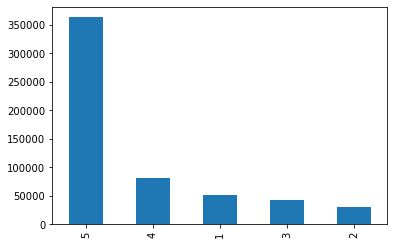

In [11]:
food_reviews['Score'].value_counts().plot(kind='bar')

In [12]:
food_reviews.Score[food_reviews.Score<=3]=0
food_reviews.Score[food_reviews.Score>=4]=1

c:\users\rhitc\appdata\local\programs\python\python37\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.
c:\users\rhitc\appdata\local\programs\python\python37\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


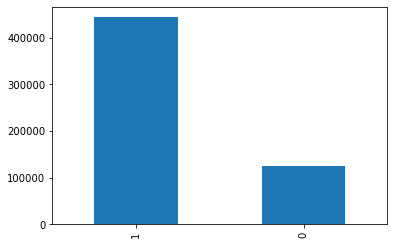

In [13]:
food_reviews['Score'].value_counts().plot(kind='bar');

In [15]:
food_reviews_df = food_reviews[['Text','Score']].dropna()

In [16]:
food_reviews_df.head()

,Text,Score
0,I have bought several of the Vitality canned d...,1
1,Product arrived labeled as Jumbo Salted Peanut...,0
2,This is a confection that has been around a fe...,1
3,If you are looking for the secret ingredient i...,0
4,Great taffy at a great price. There was a wid...,1


# Linguistic Features

### Tokenization

In [17]:
import en_core_web_sm

In [18]:
spacy_tok=en_core_web_sm.load()

In [20]:
sample_review=food_reviews_df.Text[54]

In [21]:
sample_review

"I roast at home with a stove-top popcorn popper (but I do it outside, of course). These beans (Coffee Bean Direct Green Mexican Altura) seem to be well-suited for this method. The first and second cracks are distinct, and I've roasted the beans from medium to slightly dark with great results every time. The aroma is strong and persistent. The taste is smooth, velvety, yet lively."

In [41]:
parsed_review=spacy_tok(sample_review)
parsed_review

I roast at home with a stove-top popcorn popper (but I do it outside, of course). These beans (Coffee Bean Direct Green Mexican Altura) seem to be well-suited for this method. The first and second cracks are distinct, and I've roasted the beans from medium to slightly dark with great results every time. The aroma is strong and persistent. The taste is smooth, velvety, yet lively.

*It seems there is not much diffrence in the parsed and original one*

### PArts of Speech Tagging

In [52]:
tokenized_text=pd.DataFrame()
for i,token in enumerate(parsed_review):
    tokenized_text.loc[i,'text']=token.text
    tokenized_text.loc[i,'lemma']=token.lemma_
    tokenized_text.loc[i,'pos']=token.pos_
    tokenized_text.loc[i,'tag']=token.tag_
    tokenized_text.loc[i,'dep']=token.dep_
    tokenized_text.loc[i,'shape']=token.shape_
    tokenized_text.loc[i,'is_alpha']=token.is_alpha
    tokenized_text.loc[i,'is_stop']=token.is_stop
    tokenized_text.loc[i,'is_punct']=token.is_punct


In [55]:
tokenized_text[:20]

,text,lemma,pos,tag,dep,shape,is_alpha,is_stop,is_punct
0,I,-PRON-,PRON,PRP,nsubj,X,True,True,False
1,roast,roast,VERB,VBP,ROOT,xxxx,True,False,False
2,at,at,ADP,IN,prep,xx,True,True,False
3,home,home,NOUN,NN,pobj,xxxx,True,False,False
4,with,with,ADP,IN,prep,xxxx,True,True,False
5,a,a,DET,DT,det,x,True,True,False
6,stove,stove,VERB,VB,npadvmod,xxxx,True,False,False
7,-,-,PUNCT,HYPH,punct,-,False,False,True
8,top,top,ADJ,JJ,amod,xxx,True,True,False
9,popcorn,popcorn,ADJ,JJ,compound,xxxx,True,False,False


### Named Entity Recognition(NER)

In [59]:
spacy.displacy.render(parsed_review,style='ent',jupyter=True)

### Dependency Parsing

#### Sentence boundary detection

In [61]:
sentence_span=list(parsed_review.sents)
sentence_span

[I roast at home with a stove-top popcorn popper (but I do it outside, of course).,
 These beans (Coffee Bean Direct Green Mexican Altura) seem to be well-suited for this method.,
 The first and second cracks are distinct, and I've roasted the beans from medium to slightly dark with great results every time.,
 The aroma is strong and persistent.,
 The taste is smooth, velvety, yet lively.]

In [66]:
displacy.render(parsed_review, style='dep', jupyter=True,options={'distance':80})

In [67]:
spacy.explain("ADJ") ,spacy.explain("det") ,spacy.explain("ADP") ,spacy.explain("prep")

('adjective', 'determiner', 'adposition', 'prepositional modifier')